# Importation des librairies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer

In [4]:
#pip install pygwalker

## Chargement des données

In [5]:
app_train = pd.read_csv('../data/application_train.csv')
app_test = pd.read_csv('../data/application_test.csv')

### Exploration et decouverte d'insights

In [6]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [8]:
app_train.shape

(307511, 122)

Nous avons 307511 observations caractererisées par 122 features

In [9]:
app_test.shape

(48744, 121)

Nous avons 121 feature car dans le test nous n'avaons pas le target

In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [11]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

La difference entre les variables discretes (int64) du train et celui du test s'explique par l'absence du target 

In [12]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
app_train['TARGET'].unique()

array([1, 0], dtype=int64)

Ici on voit que notre variable cible s'articule sur deux catégories :
0 : le client a pu remboursé son prèt
1 : le client n'a pas pu remboursé son pret

In [14]:
app_train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

Nous avons deux types de pret pour les clients :
***Cash loans*** : Pret en espèce
***Revolving loans*** : pret renouvelable sur une période

In [15]:
app_train['TARGET'].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

92% des client arrivent à rembourser leur prèt, seul 8 % n'y arrivent pas

<Axes: ylabel='Frequency'>

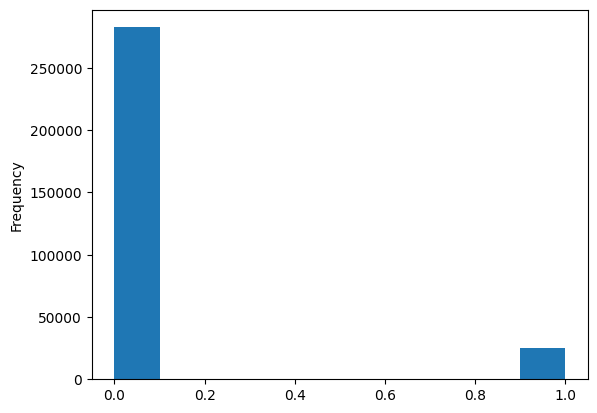

In [16]:
app_train['TARGET'].astype(int).plot.hist()

<Axes: ylabel='proportion'>

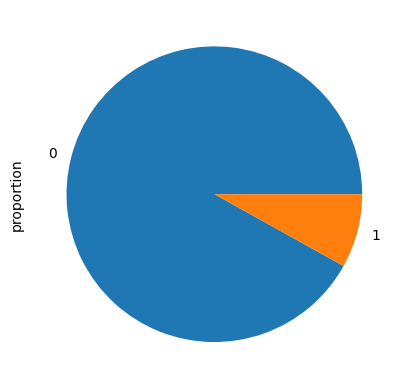

In [17]:
app_train['TARGET'].value_counts(normalize=True).plot.pie()

In [18]:
app_train[['NAME_CONTRACT_TYPE','TARGET']].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         82.927440
Revolving loans     0          8.999678
Cash loans          1          7.551275
Revolving loans     1          0.521607
Name: proportion, dtype: float64

Les prets ****Cash loans*** sont les plus plébicités par les clients soit 89% Cash loans seul 11% sont distinées aux Revolving loans.
Autrement dit si on considère l'ensemble des clients qui ont remboursé leur pret, 89% d'entre eux ont bénéficié d'un pret cash loans seuls les 11% de ceux qui ont beneficié ce pret de type ***Revolving loans*** n'ont pas pu remboursé .

Ceci pose un probème majeur d'***unbalancing data*** . En effet les stats ci-dessus prouvent qu'il y'a une difference drastiques de la classe prédite ce qui pourrait biaisé la qualité de prediction de notre model.
Nous allons réfléchir à résoudre cette problematique majeure avant d'appliquer notre model.

***Problèmatique metier*** : Du point de vue métier le problème ici est lié à un désequilibrage de l'octroi des prets autrement dit il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés.
Ce fait pourrait induire notre modele de prediction en erreur dans la mesure où la classe majeure est souvent prédit ce qui pourrait faire penser que les clients peuvent rembourser donc prédit plus la classe 0 au détriment de la classe 1.

In [19]:
app_train['CODE_GENDER'].value_counts(normalize=True)*100

CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64

***Noisy DATA*** : Ici nous avons 0,001% de personne dont le sexe n'a pas été identifié ou male identifié cette proportion étant négligeable  devant les proportions respectives 
de notre jeu de données fait que ces individus pourront etre supprimer dans l'étape suivante du traitement de notre dataset.

In [20]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

***Variables catégorielles*** : On constate que la plupart des variables catégorielles ont un nombre relativement faible d'entrées uniques.Autrement dit les valeurs distinctes de ces colonnes s'articulent autour de 2,3,4,6 donc relativement faibles, donc nous devrons trouver un moyen d'ajuster à ces variables catégorielles.En effet les algorithmes ML ne peuvent pas interpreter des variables cathegorielles donc l'idée sera de trouver un moyen de parlier à ces variables sans alterer l'efficacité/précision du modèle.

### Recherche de missing values

In [21]:
# Fonction pour calculer les valeurs manquantes par colonne
def missing_values_table(df) :
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_rename_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : 'Pourcentage_NAN'})
        mis_val_table_rename_columns = mis_val_table_rename_columns[
            mis_val_table_rename_columns.iloc[:,1] != 0].sort_values('Pourcentage_NAN', ascending=False).round(1)
        print ("Votre dataframe sélectionné a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_rename_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        return mis_val_table_rename_columns

stats_mv = missing_values_table(df=app_train)

Votre dataframe sélectionné a 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


In [22]:
stats_mv.head(10)

,Valeurs manquantes,Pourcentage_NAN
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [23]:
stats_mv.tail(10)

,Valeurs manquantes,Pourcentage_NAN
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66],
 [Text(0, 0, 'COMMONAREA_MEDI'),
  Text(1, 0, 'COMMONAREA_AVG'),
  Text(2, 0, 'COMMONAREA_MODE'),
  Text(3, 0, 'NONLIVINGAPARTMENTS_MEDI'),
  Text(4, 0, 'NONLIVINGAPARTMENTS_MODE'),
  Text(5, 0, 'NONLIVINGAPARTMENTS_AVG'),
  Text(6, 0, 'FONDKAPREMONT_MODE'),
  Text(7, 0, 'LIVINGAPARTMENTS_MODE'),
  Text(8, 0, 'LIVINGAPARTMENTS_MEDI'),
  Text(9, 0, 'LIVINGAPARTMENTS_AVG'),
  Text(10, 0, 'FLOORSMIN_MODE'),
  Text(11, 0, 'FLOORSMIN_MEDI'),
  Text(12, 0, 'FLOORSMIN_AVG'),
  Text(13, 0, 'YEARS_BUILD_MODE'),
  Text(14, 0, 'YEARS_BUILD_MEDI'),
  Text(15, 0, 'YEARS_BUILD_AVG'),
  Text(16, 0, 'OWN_CAR_AGE'),


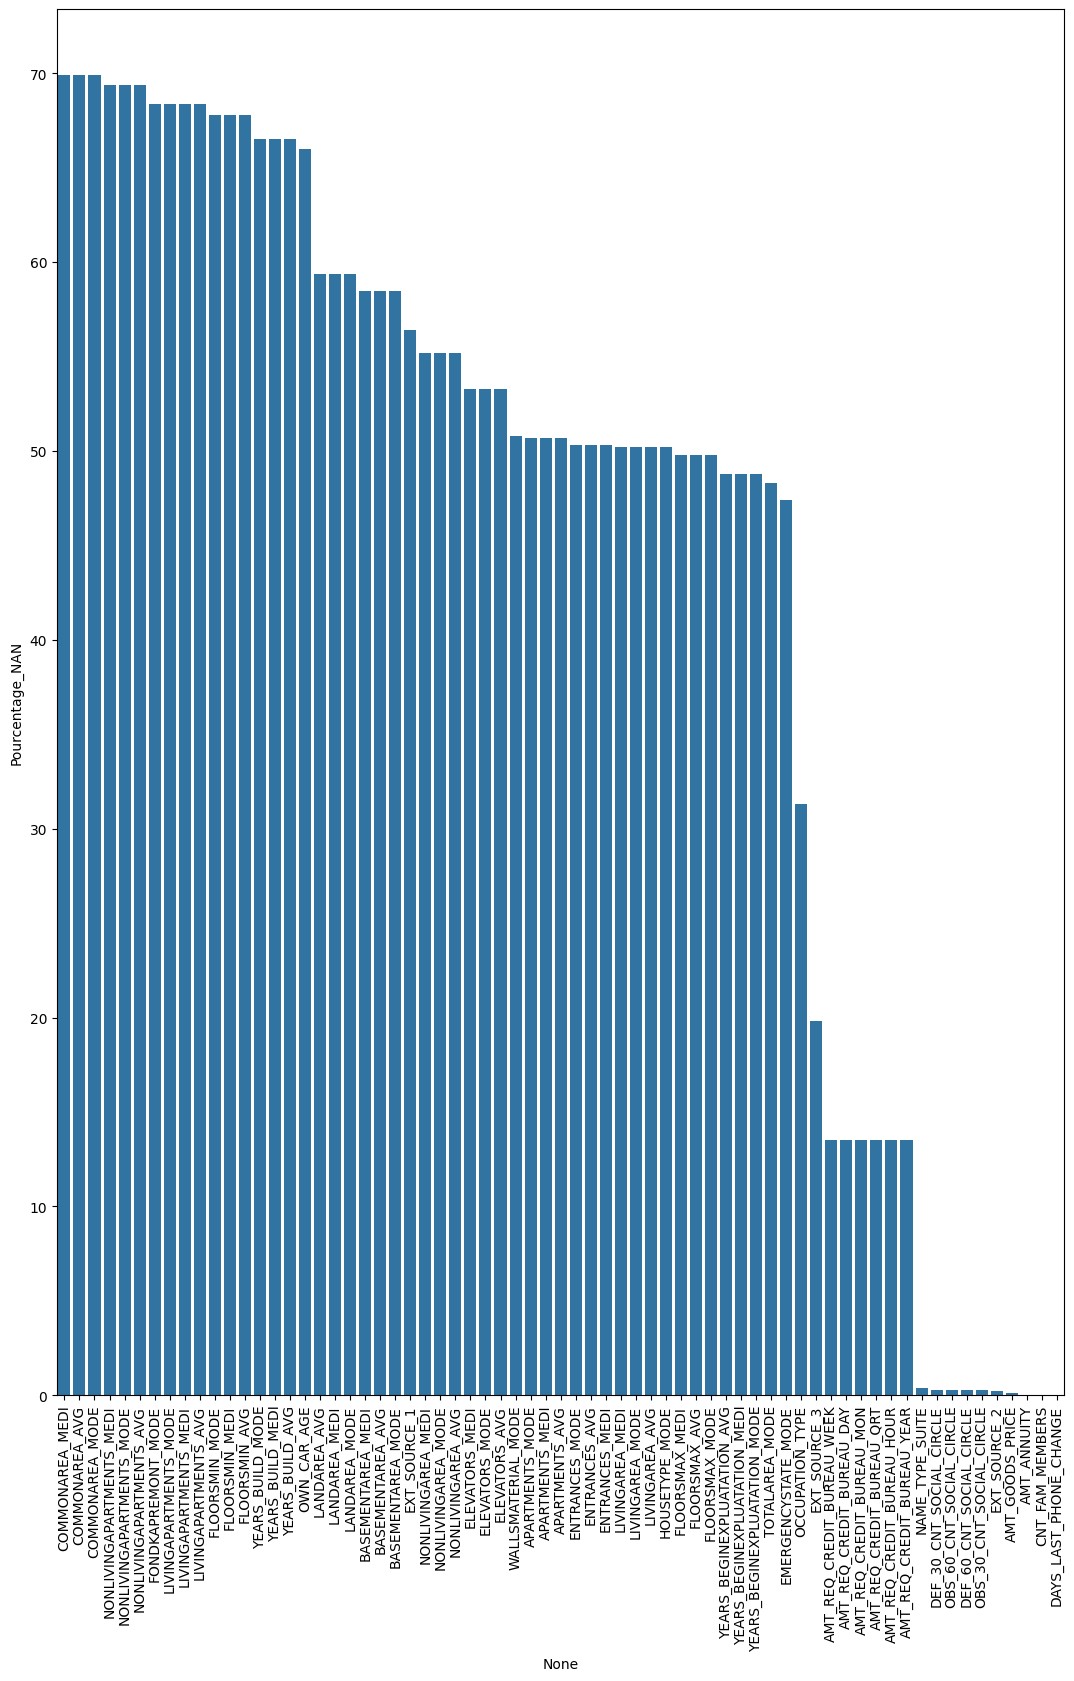

In [24]:
plt.figure(figsize=(13,18))
sns.barplot(x=stats_mv.index, y=stats_mv.Pourcentage_NAN)
plt.xticks(rotation=90)

In [25]:
stats_mv[stats_mv.Pourcentage_NAN < 1]

,Valeurs manquantes,Pourcentage_NAN
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


In [26]:
app_train[app_train['NAME_TYPE_SUITE'].isnull()]['DEF_30_CNT_SOCIAL_CIRCLE']

64        0.0
724       1.0
1199      0.0
1669      0.0
1862      0.0
         ... 
306273    0.0
306544    0.0
306615    0.0
306636    0.0
306725    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 1292, dtype: float64

### Recherche d'outliers

In [27]:
#recherche d'ouliers: elle crée une distribution normale aleatoire de pret bancaire 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
app_train['AMT_INCOME_TOTAL'].describe()

count      307511.000
mean       168797.919
std        237123.146
min         25650.000
25%        112500.000
50%        147150.000
75%        202500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [28]:
Q25 = 112500
Q75 = 202500
ei = Q75 - Q25
lim_min = Q25 - 1.5* ei
lim_max = Q75 + 1.5*ei

In [29]:
print(lim_min)

-22500.0


In [30]:
print(lim_max)

337500.0


<Axes: >

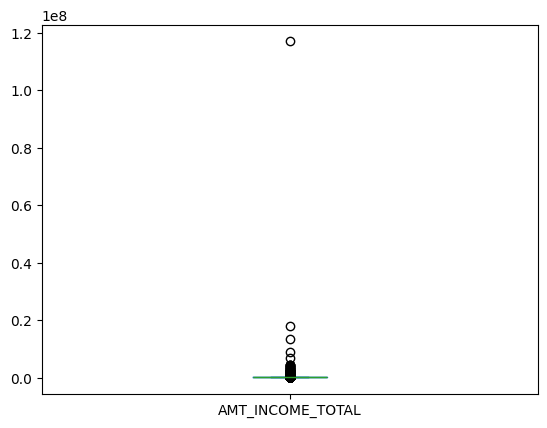

In [31]:
app_train.AMT_INCOME_TOTAL.plot.box()

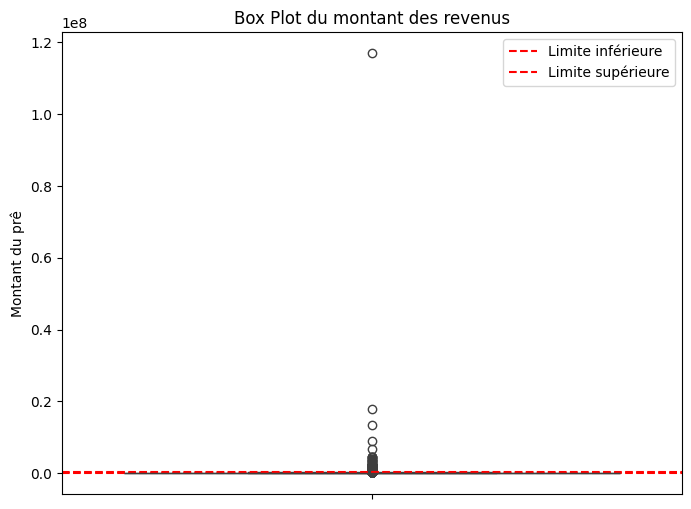

In [32]:
# Créer un box plot avec les limites spécifiées
plt.figure(figsize=(8, 6))
sns.boxplot(app_train['AMT_INCOME_TOTAL'], showfliers=True)  
plt.axhline(y=lim_min, color='r', linestyle='--', label='Limite inférieure')
plt.axhline(y=lim_max, color='r', linestyle='--', label='Limite supérieure')
plt.legend()
plt.title('Box Plot du montant des revenus')
plt.ylabel('Montant du prê')
plt.show()

Ici j'utilise la méthode de la règle des 1,5 interquartiles (IQR).Autrement dit :
***Q25*** représente le premier quartile (25e percentile), ce qui signifie que 25% de vos données sont inférieures à cette valeur.
***Q75*** représente le troisième quartile (75e percentile), ce qui signifie que 75% de vos données sont inférieures à cette valeur.
***ei*** est l'écart interquartile, calculé comme la différence entre Q75 et Q25. Cela représente la dispersion des valeurs au sein de votre ensemble de données.
***lim_min*** est la limite inférieure des valeurs, calculée en soustrayant 1,5 fois l'écart interquartile de Q25. Cela identifie les valeurs considérées comme des valeurs aberrantes inférieures.
***lim_max*** est la limite supérieure des valeurs, calculée en ajoutant 1,5 fois l'écart interquartile à Q75. Cela identifie les valeurs considérées comme des valeurs aberrantes supérieures.

***Valeurs abbérantes*** : En plus de 10% de la population présente des valeurs de prét trés importantes ce qui se traduits par une proportion de personnes trés riches avec une solvabilité importante ceux qui peut impacter la dispersion normale ,

In [33]:
var  = app_train.select_dtypes(include=['int64', 'float64']).corr()['TARGET'].sort_values(ascending=False)

In [34]:
var

TARGET                         1.000
DAYS_BIRTH                     0.078
REGION_RATING_CLIENT_W_CITY    0.061
REGION_RATING_CLIENT           0.059
DAYS_LAST_PHONE_CHANGE         0.055
                               ...  
FLOORSMAX_AVG                 -0.044
DAYS_EMPLOYED                 -0.045
EXT_SOURCE_1                  -0.155
EXT_SOURCE_2                  -0.160
EXT_SOURCE_3                  -0.179
Name: TARGET, Length: 106, dtype: float64

Ici on constate que dans la correlation positive la variable qui influe le plus sur la solvabilité du client est le 'DAYS_BIRTH'

## Pré-processing

#### Noisy data

In [35]:
app_train = app_train[~(app_train['CODE_GENDER'] == 'XNA')]

In [36]:
app_train.shape

(307507, 122)

# Feature Engineering

## Missing values 

Le nettoyage se fera en plusieurs etapes:
1 - Supprimer les colonnes avec plus de 50% de valeurs manquantes, En effet ces colonnes présentent une faible information Gain ce qui reduit drastiquement leur impact sur le modèle
2 - Appliquer une technique imputage pour les colonnes de moins de 50 %, cette methode est plus sure pour eviter toute perte d'information

In [37]:
missing_percentage = app_train.isnull().mean() * 100
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
app_train_cleaned = app_train.drop(columns=columns_to_drop)
print("\nDataFrame après suppression des colonnes avec plus de 50 % valeurs manquantes:")
print(app_train_cleaned)


DataFrame après suppression des colonnes avec plus de 50 % valeurs manquantes:
        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHI

On passe de 122 colonnes à 81 colonnes soit 41 colonnes contenant plus de 50% de valeurs nulles parmi les 61 colonnes contenant des valeurs manquantes donc les 20 colonnes restantes se verront appliqué une technique d'imputation

In [38]:
stat_mv_after_cleaned = missing_values_table(app_train_cleaned)
stat_mv_after_cleaned

Votre dataframe sélectionné a 81 colonnes.
Il y a 26 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,Pourcentage_NAN
FLOORSMAX_AVG,153019,49.800
FLOORSMAX_MODE,153019,49.800
FLOORSMAX_MEDI,153019,49.800
YEARS_BEGINEXPLUATATION_AVG,150006,48.800
YEARS_BEGINEXPLUATATION_MODE,150006,48.800
YEARS_BEGINEXPLUATATION_MEDI,150006,48.800
TOTALAREA_MODE,148430,48.300
EMERGENCYSTATE_MODE,145754,47.400
OCCUPATION_TYPE,96389,31.300
EXT_SOURCE_3,60965,19.800


In [39]:
stat_mv_after_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, FLOORSMAX_AVG to DAYS_LAST_PHONE_CHANGE
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Valeurs manquantes  26 non-null     int64  
 1   Pourcentage_NAN     26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0+ bytes


In [40]:
app_train_cleaned[stat_mv_after_cleaned.index.tolist()]

,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,...,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,0.083,0.083,0.083,0.972,0.972,0.972,0.015,No,Laborers,0.139,...,Unaccompanied,2.000,2.000,2.000,2.000,0.263,351000.000,24700.500,1.000,-1134.000
1,0.292,0.292,0.292,0.985,0.985,0.985,0.071,No,Core staff,NaN,...,Family,0.000,1.000,0.000,1.000,0.622,1129500.000,35698.500,2.000,-828.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,0.730,...,Unaccompanied,0.000,0.000,0.000,0.000,0.556,135000.000,6750.000,1.000,-815.000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,...,Unaccompanied,0.000,2.000,0.000,2.000,0.650,297000.000,29686.500,2.000,-617.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Core staff,NaN,...,Unaccompanied,0.000,0.000,0.000,0.000,0.323,513000.000,21865.500,1.000,-1106.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.604,0.458,0.604,0.988,0.978,0.988,0.290,No,Sales staff,NaN,...,Unaccompanied,0.000,0.000,0.000,0.000,0.682,225000.000,27558.000,1.000,-273.000
307507,0.083,0.083,0.083,0.973,0.973,0.973,0.021,No,NaN,NaN,...,Unaccompanied,0.000,0.000,0.000,0.000,0.116,225000.000,12001.500,1.000,0.000
307508,0.167,0.167,0.167,0.982,0.982,0.982,0.797,No,Managers,0.219,...,Unaccompanied,0.000,6.000,0.000,6.000,0.536,585000.000,29979.000,1.000,-1909.000
307509,0.042,0.042,0.042,0.977,0.977,0.977,0.009,No,Laborers,0.661,...,Unaccompanied,0.000,0.000,0.000,0.000,0.514,319500.000,20205.000,2.000,-322.000


In [41]:
df_cleaned = app_train_cleaned
# Liste des colonnes avec des valeurs manquantes
missing_columns = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
print("Colonnes avec des valeurs manquantes:", missing_columns)
#len(missing_columns)

Colonnes avec des valeurs manquantes: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [42]:
# Séparer les colonnes numériques et catégorielles
num_cols = df_cleaned[missing_columns].select_dtypes(include=['number']).columns
cat_cols = df_cleaned[missing_columns].select_dtypes(exclude=['number']).columns

# Imputation pour les colonnes numériques (moyenne)
num_imputer = SimpleImputer(strategy='mean')
df_cleaned[num_cols] = num_imputer.fit_transform(df_cleaned[num_cols])

# Imputation pour les colonnes catégorielles (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[cat_cols] = cat_imputer.fit_transform(df_cleaned[cat_cols])

In [43]:
df_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,0.006,0.007,0.034,0.267,0.265,1.900
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.000,254700.000,27558.000,...,0,0,0,0,0.006,0.007,0.034,0.267,0.265,1.900
307507,456252,0,Cash loans,F,N,Y,0,72000.000,269550.000,12001.500,...,0,0,0,0,0.006,0.007,0.034,0.267,0.265,1.900
307508,456253,0,Cash loans,F,N,Y,0,153000.000,677664.000,29979.000,...,0,0,0,0,1.000,0.000,0.000,1.000,0.000,1.000
307509,456254,1,Cash loans,F,N,Y,0,171000.000,370107.000,20205.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [44]:
#verification du nettoyage
df_cleaned_verif = missing_values_table(df_cleaned)
df_cleaned_verif

Votre dataframe sélectionné a 81 colonnes.
Il y a 0 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,Pourcentage_NAN


Donc notre dataframe est maintenant propre.Pour resumé notre approche ici pour nettoyer le dataframe :
nous avons identifié les colonnes avec des valeurs manquantes et dont la proportion reste en dessous de 50% du gain d'informations.
nous avons séparé les colonnes numériques et catégorielle car on ne peut pas appliquer les memes strategies d'imputation pour des cathegories diffrentes,
Nous appliqué l'imputation "SimpleImputer" de scikit-learn avec la stratégie 'mean' pour les colonnes numériques et 'most_frequent' pour les colonnes catégorielles.
L'avantage de ce procedé est que l'imputation par la moyenne est une méthode simple, efficace et garde statiquement la distribution normale de nos données, Elle est facile à comprendre et à implémenter, ce qui la rend pratique pour des analyses exploratoires vaste.
En plus en remplaçant les valeurs manquantes par la moyenne, nous préservons la moyenne de la colonne par messure de securité aux données, ce qui est particulièrement utile si cette moyenne a une signification importante dans notre analyse.
Elle evite également la perte de données c'est à dire au lieu de supprimer les lignes avec des valeurs manquantes, l'imputation permet de conserver autant de données que possible, gardant ainsi la taille de l'échantillon pour l'analyse.


### Drop les outliers 

In [45]:
df_cleaned = df_cleaned[(df_cleaned.AMT_INCOME_TOTAL >= lim_min) & (df_cleaned.AMT_INCOME_TOTAL <= lim_max)]

In [46]:
df_cleaned.shape

(293472, 81)

<Axes: >

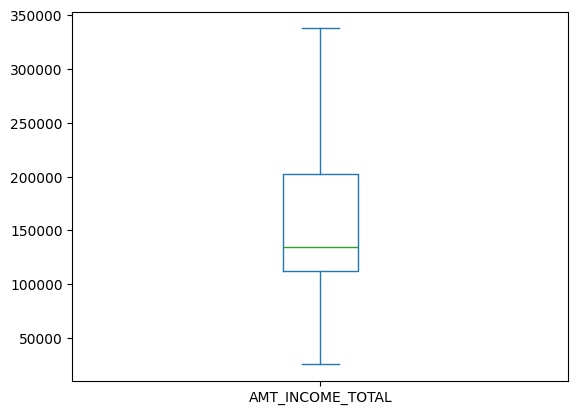

In [47]:
df_cleaned[df_cleaned.AMT_INCOME_TOTAL <= lim_max].AMT_INCOME_TOTAL.plot.box()

Ici on constate que notre dataframe ne contient plus d'outlier qui pourrait biaiser notre prediction

***Unbalacing data***

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Création d'un objet LabelEncoder
le = LabelEncoder()
le_count = 0
for col in df_cleaned:
    if df_cleaned[col].dtype == 'object':
        if len(list(df_cleaned[col].unique())) <= 2:
            le.fit(df_cleaned[col])
            df_cleaned[col] = le.transform(df_cleaned[col])
            le_count += 1

print('%d columns were label encoded.' % le_count)
df_cleaned_encod = pd.get_dummies(df_cleaned)

C:\Users\ULRICH\AppData\Local\Temp\ipykernel_21588\4128251532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.transform(df_cleaned[col])
C:\Users\ULRICH\AppData\Local\Temp\ipykernel_21588\4128251532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.transform(df_cleaned[col])
C:\Users\ULRICH\AppData\Local\Temp\ipykernel_21588\4128251532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

5 columns were label encoded.


In [49]:
df_cleaned_encod

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,1,0,1,0,202500.000,406597.500,24700.500,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,0,0,0,0,270000.000,1293502.500,35698.500,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,1,1,1,1,0,67500.000,135000.000,6750.000,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,0,0,1,0,135000.000,312682.500,29686.500,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,1,0,1,0,121500.000,513000.000,21865.500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.000,254700.000,27558.000,...,False,False,False,False,False,False,False,False,False,False
307507,456252,0,0,0,0,1,0,72000.000,269550.000,12001.500,...,False,False,False,False,False,False,False,False,False,True
307508,456253,0,0,0,0,1,0,153000.000,677664.000,29979.000,...,False,False,False,False,False,False,False,False,False,False
307509,456254,1,0,0,0,1,0,171000.000,370107.000,20205.000,...,False,False,False,False,False,False,False,False,False,False


In [50]:
X = df_cleaned_encod.drop('TARGET',axis=1)
y = df_cleaned_encod['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

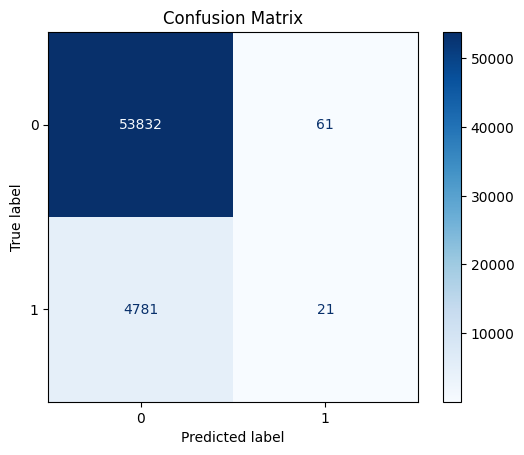

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [52]:
acc = cm.diagonal().sum()/cm.sum()*100
print(acc)

91.75057500638896


Nous avons une précison 91% ne notre model de prédiction. On pourrait l'ameliorer avec des methodes de tunnig

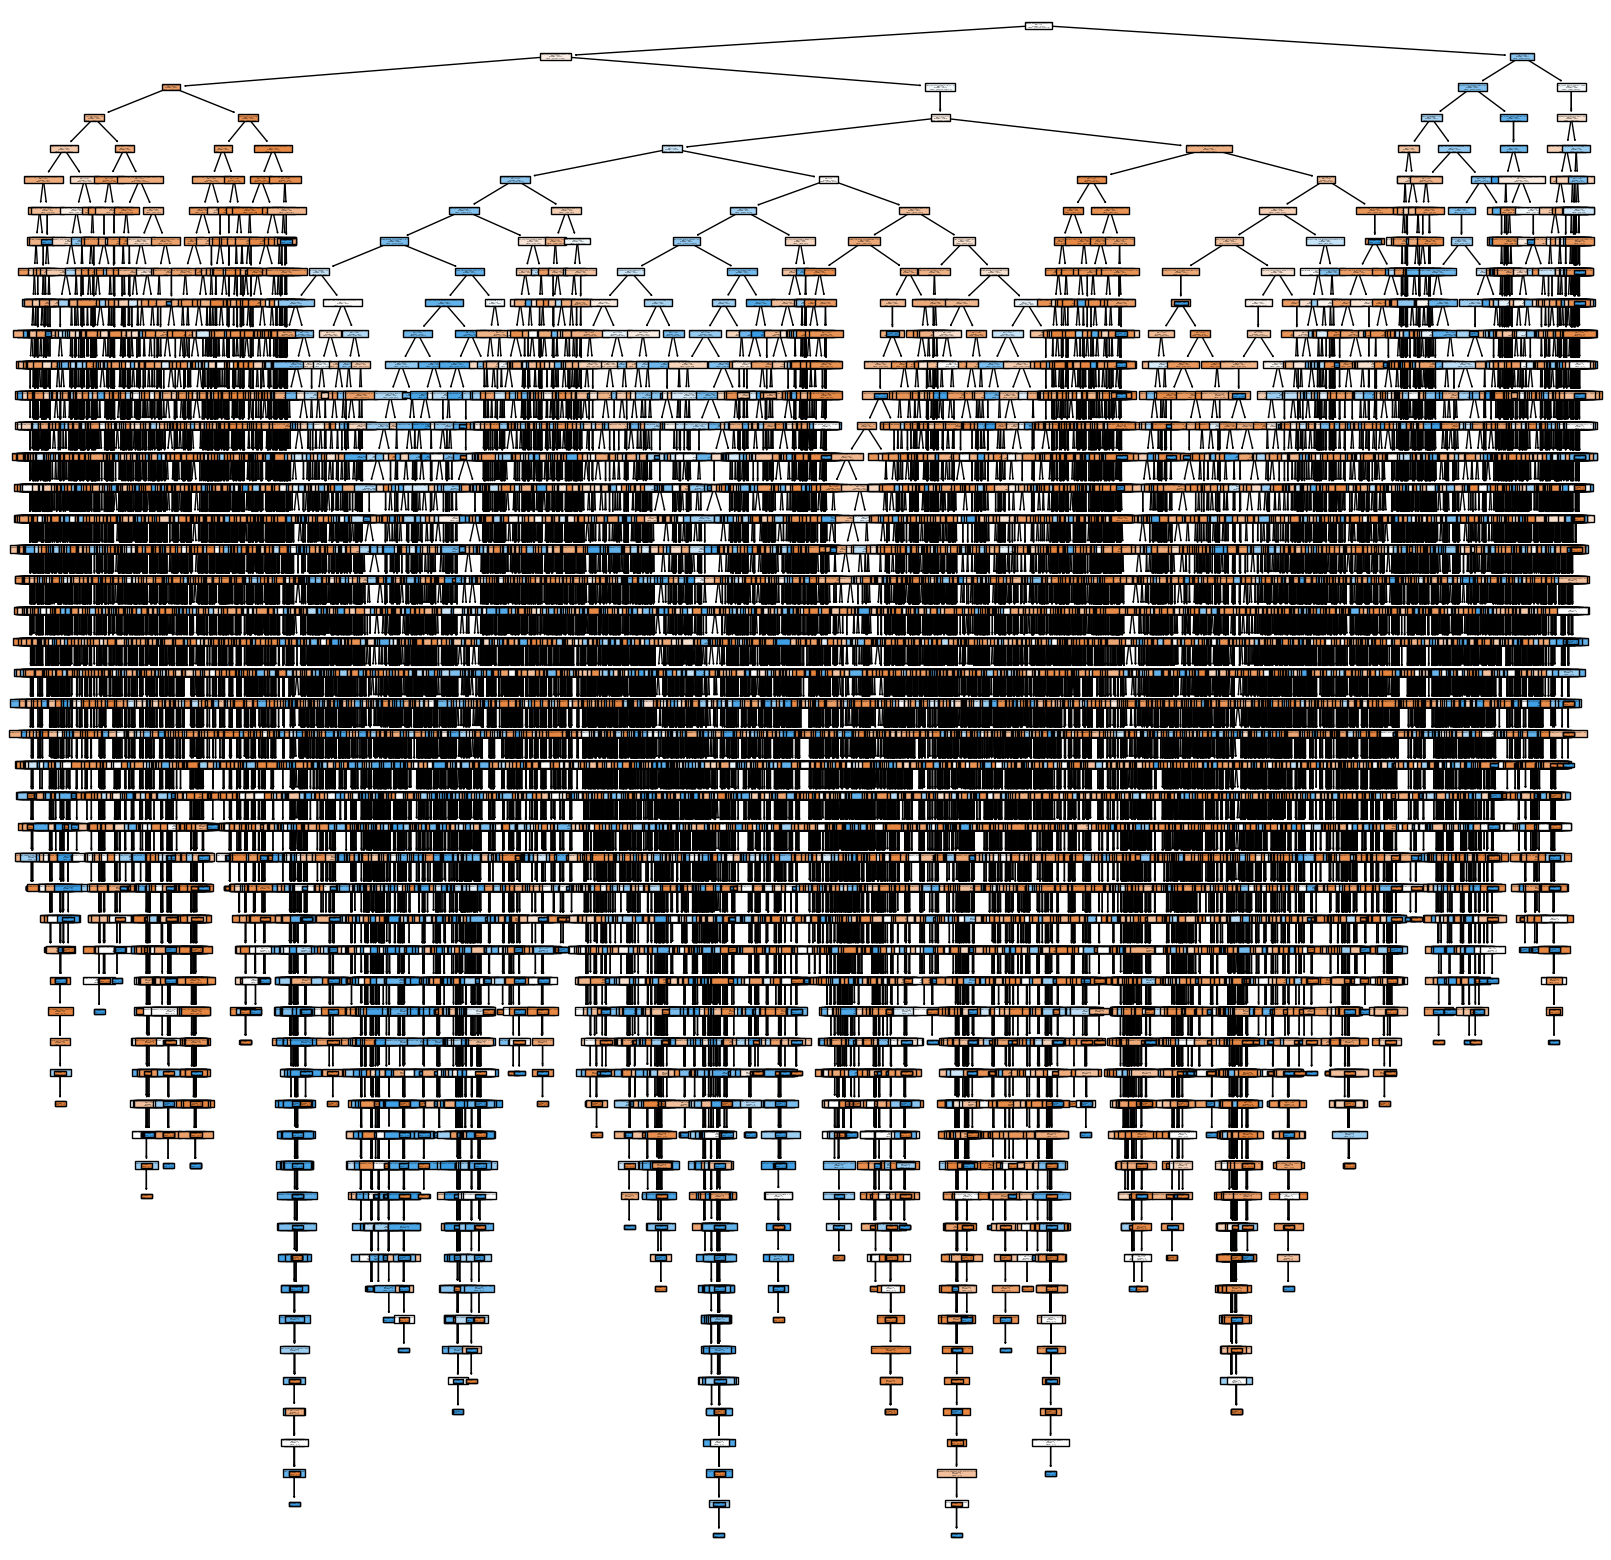

In [53]:
# Dessiner l'arbre de classification dans le randomForest
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)

## TUNNING DU MODEL

ici pour tunner nortre model, nous allons appliqué la technique de la validation croisée ou cross validation. La validation croisée est une méthode de Machine Learning qui permet d'ameliorer et d'évaluer les performances des modèles d'apprentissage automatique. Lorsqu'on entraîne un modèle sur des données étiquetées, on émet l'hypothèse qu'il doit également fonctionner sur de nouvelles données. Une confirmation supplémentaire sera tout de même nécessaire pour s'assurer de l'exactitude ou non de ses prédictions. La validation croisée permet justement de vérifier si cette hypothèse est valide, ou non, Elle permet égaelment d'eviter l'overfiting ou sur-apprentissage du model. Dans ce tunning nous allons appliquer l'approche des K-Folds.

## Validation croisée

In [54]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
model = RandomForestClassifier(random_state=42)

# Validation croisée avec StratifiedKFold(c'est à dire regrouper les données en groupes homogènes)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scores de chaque fold(c'est l'equivalent k dans k-means à peu prés meme s'il y'a une difference mais juste pour comprendre
cross_val_scores = []

for train_index, val_index in skf.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_resampled.iloc[train_index], y_resampled.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    score = model.score(X_val_fold, y_val_fold)
    cross_val_scores.append(score)
print("Scores de validation croisée : ", cross_val_scores)
print("Score moyen de validation croisée : ", sum(cross_val_scores) / len(cross_val_scores)*100)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Scores de validation croisée :  [0.9553277357702834, 0.9540520480586352, 0.954933432295774, 0.9543767685670548, 0.9548870436517141]
Score moyen de validation croisée :  95.47154056686922
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     53893
           1       0.26      0.00      0.01      4802

    accuracy                           0.92     58695
   macro avg       0.59      0.50      0.48     58695
weighted avg       0.86      0.92      0.88     58695

Confusion Matrix:
[[53832    61]
 [ 4781    21]]


 Apres avoir tunner le model, on consate une nette amelioration de la,qualité de prediction de notre modèle passant de 91%à 95,47% ce qui rend notre modele plus précis et plus efficace dans sa prédiction.

On peut également creer un df pour selectionner les features qui influent le plus sur notre model si on ne veut pas dessiner l'arbre car le nombre de feature est tres large

In [55]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_fold.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
32,EXT_SOURCE_3,0.053
31,EXT_SOURCE_2,0.046
21,CNT_FAM_MEMBERS,0.039
41,OBS_30_CNT_SOCIAL_CIRCLE,0.036
71,AMT_REQ_CREDIT_BUREAU_YEAR,0.036
...,...,...
84,NAME_INCOME_TYPE_Student,0.000
79,NAME_INCOME_TYPE_Businessman,0.000
15,FLAG_MOBIL,0.000
56,FLAG_DOCUMENT_12,0.000


In [56]:
import pickle

# Sauvegarde du modèle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [57]:
# Afficher les premières lignes du DataFrame
print(df_cleaned_encod.head())


   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0        202500.000  406597.500    24700.500   
1                0             0        270000.000 1293502.500    35698.500   
2                1             0         67500.000  135000.000     6750.000   
3                1             0        135000.000  312682.500    29686.500   
4                1             0        121500.000  513000.000    21865.500   

   ...  ORGANIZATION_TYPE_Trade: type 4  ORGANIZATION_TYPE_Trade: type 5  \
0  ...          

In [58]:
!pip install pymongo


In [59]:
from pymongo import MongoClient

# Connexion à MongoDB (localhost:27017 est l'hôte par défaut)
client = MongoClient('mongodb://localhost:27017/')

# Accès à la base de données 'farmd' que vous avez montrée dans MongoDB Compass
db = client['farmd']

# Accès à la collection 'User' (ou une autre collection si nécessaire)
collection = db['credit']


In [60]:
# Convertir le DataFrame en une liste de dictionnaires
data_to_insert = df_cleaned_encod.to_dict('records')


In [61]:
# Insérer les données dans la collection MongoDB
collection.insert_many(data_to_insert)

print("Données insérées dans MongoDB avec succès")


Données insérées dans MongoDB avec succès


In [62]:
# Vérification des données insérées
for doc in collection.find().limit(5):
    print(doc)


{'_id': ObjectId('66de4885d6c6a7cdc88a5ae4'), 'SK_ID_CURR': 100002, 'TARGET': 1, 'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 202500.0, 'AMT_CREDIT': 406597.5, 'AMT_ANNUITY': 24700.5, 'AMT_GOODS_PRICE': 351000.0, 'REGION_POPULATION_RELATIVE': 0.018801, 'DAYS_BIRTH': -9461, 'DAYS_EMPLOYED': -637, 'DAYS_REGISTRATION': -3648.0, 'DAYS_ID_PUBLISH': -2120, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'CNT_FAM_MEMBERS': 1.0, 'REGION_RATING_CLIENT': 2, 'REGION_RATING_CLIENT_W_CITY': 2, 'HOUR_APPR_PROCESS_START': 10, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 0, 'EXT_SOURCE_2': 0.2629485927471776, 'EXT_SOURCE_3': 0.1393757800997895, 'YEARS_BEGINEXPLUATATION_AVG': 0.9722, 'FLOORSMAX_AVG': 0.0833, 'YEARS_BEGIN

In [63]:
# Sauvegarder le DataFrame au format CSV
df_cleaned_encod.to_csv('df_cleaned_encod.csv', index=False)